In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


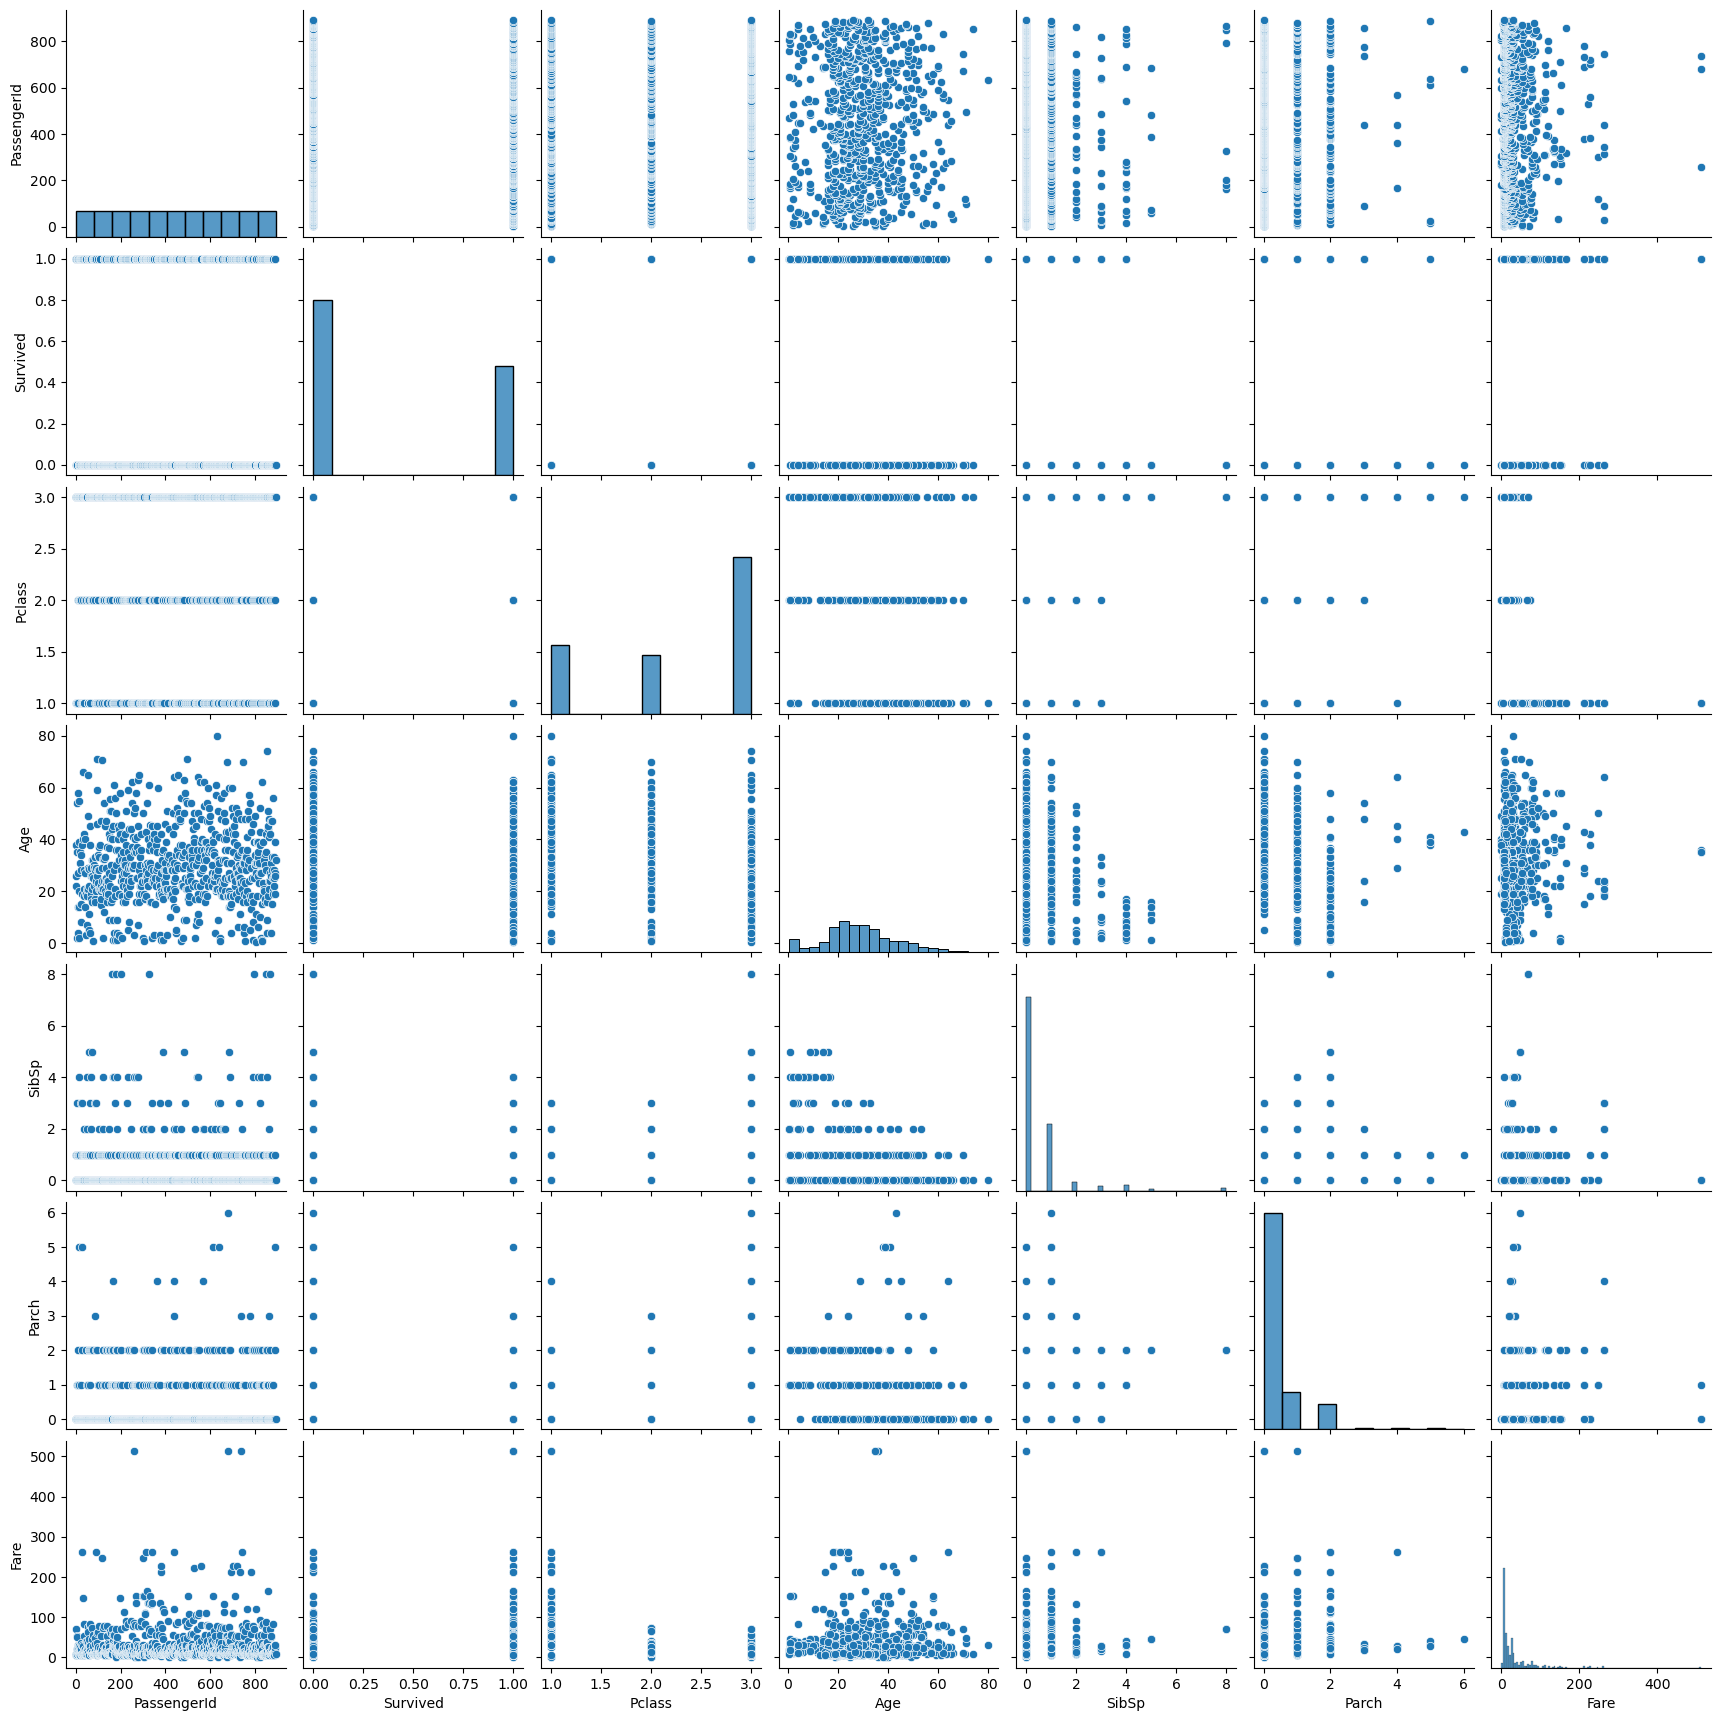

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

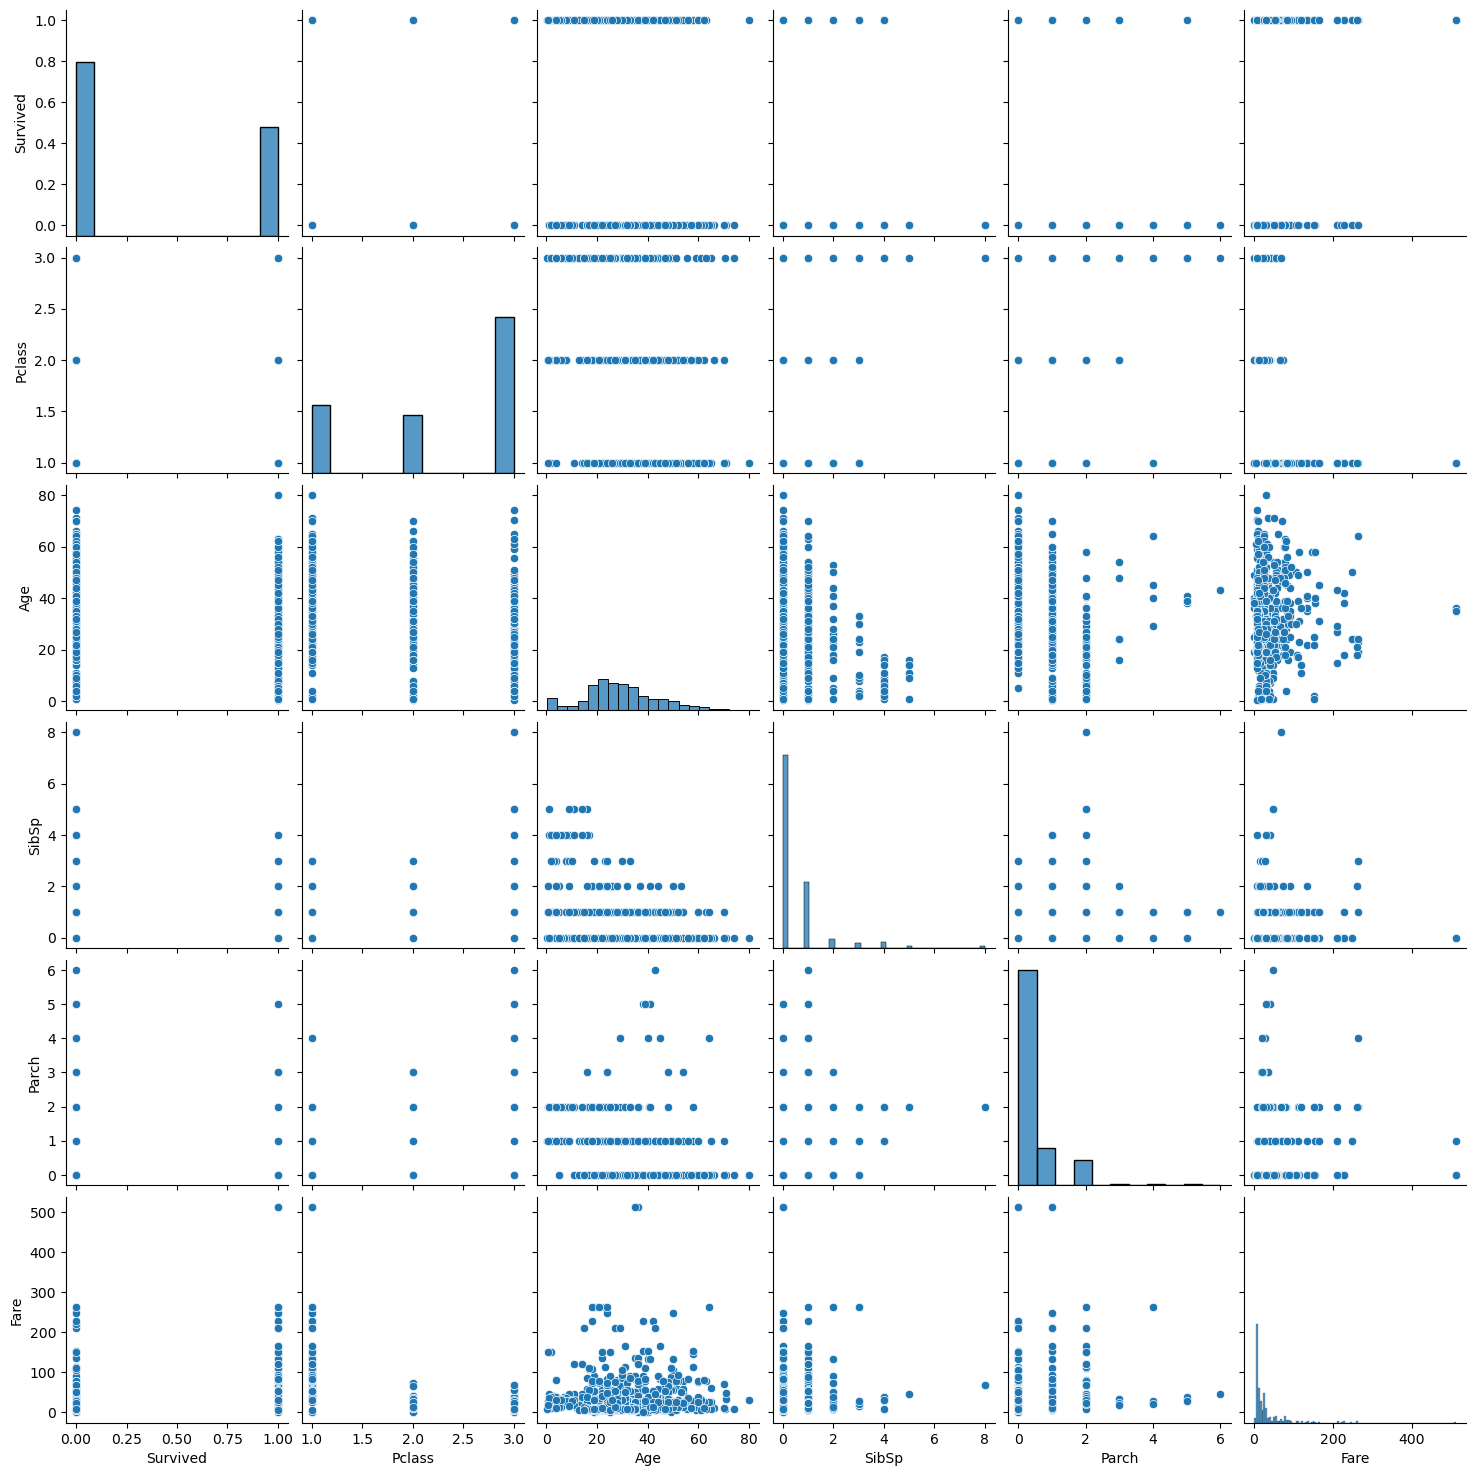

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
df['Age'].median()

28.0

In [11]:
df['Fare'].median()

14.4542

In [12]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [14]:
#df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df.duplicated().sum()

116

In [17]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
770,0,3,female,39.0,0,5,29.1250,Q
771,1,1,female,19.0,0,0,30.0000,S
772,0,3,female,28.0,1,2,23.4500,S
773,1,1,male,26.0,0,0,30.0000,C


In [19]:
df = pd.get_dummies(df,drop_first=True)

In [20]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
770,0,3,39.0,0,5,29.1250,0,1,0
771,1,1,19.0,0,0,30.0000,0,0,1
772,0,3,28.0,1,2,23.4500,0,0,1
773,1,1,26.0,0,0,30.0000,1,0,0


In [21]:
df['Age'].skew()

0.44198678493510685

In [22]:
df['Fare'].skew()

4.549950352869661

In [23]:
df['Age'].min()

0.42

In [24]:
df['Fare'].min()

0.0

In [25]:
from scipy.stats import boxcox
df['Age'], param = boxcox(df['Age'])
df['Fare'],param = boxcox(df['Fare']+0.0001)

In [26]:
print(df['Age'].skew())
df['Fare'].skew()

0.0032865210109074643


0.35025532610091775

In [27]:
from feature_engine.outliers import Winsorizer
win = Winsorizer(capping_method='iqr',tail='both',fold=1.5)
df['Age'] = win.fit_transform(df[['Age']])
df['Fare'] = win.fit_transform(df[['Fare']])

In [28]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [29]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,13.096912,1,0,2.446834,1,0,1
1,1,20.777081,1,0,6.839880,0,0,0
2,3,15.106266,0,0,2.582004,0,0,1
3,1,19.401285,1,0,6.151181,0,0,1
4,3,19.401285,0,0,2.606024,1,0,1
...,...,...,...,...,...,...,...,...
770,3,21.230378,0,5,4.869823,0,1,0
771,1,11.537632,0,0,4.929329,0,0,1
772,3,16.085379,1,2,4.445034,0,0,1
773,1,15.106266,0,0,4.929329,1,0,0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [39]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [40]:
model = XGBClassifier(gamma=0,max_depth=4,n_estimators=44)
model.fit(X_train,y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
print('Cross Validation Score:',cross_val_score(model,X,y,cv=5).mean())

Training Accuracy: 0.9241935483870968
Test Accuracy: 0.8193548387096774
Cross Validation Score: 0.8


In [35]:
Train = []
Test = []
CV = []

for i in range(0,101):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    model = XGBClassifier(gamma=0,max_depth=4,n_estimators=44)
    model.fit(X_train,y_train)
    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))
    CV.append(cross_val_score(model,X,y,cv=5).mean())
    
em = pd.DataFrame({'Train':Train,'Test':Test,'CV':CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
gm[gm['Test']==gm['Test'].max()].index.to_list()

[21]

In [172]:
df1 = pd.read_csv('train.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [173]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
df1['Age'].fillna(df1['Age'].median(),inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True)

In [175]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [176]:
def wom_chld(df1):
    age, sex = df1['Age'], df1['Sex']
    if age < 18 or sex == 'female':
        return 'Women/Children'
    else:
        return 'Adult Male'

In [177]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [178]:
df1['women_children'] = df1.apply(wom_chld, axis=1)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,women_children
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult Male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Women/Children
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Women/Children
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Women/Children
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult Male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Women/Children
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Women/Children
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult Male


In [179]:
df1[df1['women_children']=='Women/Children']['Survived'].value_counts()

1    256
0    116
Name: Survived, dtype: int64

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        891 non-null    object 
 12  women_children  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [180]:
df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [181]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,women_children
0,0,3,male,22.0,1,0,7.2500,S,Adult Male
1,1,1,female,38.0,1,0,71.2833,C,Women/Children
2,1,3,female,26.0,0,0,7.9250,S,Women/Children
3,1,1,female,35.0,1,0,53.1000,S,Women/Children
4,0,3,male,35.0,0,0,8.0500,S,Adult Male
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Adult Male
887,1,1,female,19.0,0,0,30.0000,S,Women/Children
888,0,3,female,28.0,1,2,23.4500,S,Women/Children
889,1,1,male,26.0,0,0,30.0000,C,Adult Male


In [182]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,women_children
0,0,3,male,22.0,1,0,7.2500,S,Adult Male
1,1,1,female,38.0,1,0,71.2833,C,Women/Children
2,1,3,female,26.0,0,0,7.9250,S,Women/Children
3,1,1,female,35.0,1,0,53.1000,S,Women/Children
4,0,3,male,35.0,0,0,8.0500,S,Adult Male
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Adult Male
887,1,1,female,19.0,0,0,30.0000,S,Women/Children
888,0,3,female,28.0,1,2,23.4500,S,Women/Children
889,1,1,male,26.0,0,0,30.0000,C,Adult Male


In [183]:
df1[df1['women_children']=='Women/Children']['Survived']

1      1
2      1
3      1
7      0
8      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 372, dtype: int64

In [128]:
#df1['Age'] = win.fit_transform(df1[['Age']])
#df1['Fare'] = win.fit_transform(df1[['Fare']])

In [184]:
df1 = pd.get_dummies(df1,drop_first=True)
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,women_children_Women/Children
0,0,3,22.0,1,0,7.2500,1,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,1
2,1,3,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,1
4,0,3,35.0,0,0,8.0500,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,1,1
888,0,3,28.0,1,2,23.4500,0,0,1,1
889,1,1,26.0,0,0,30.0000,1,0,0,0


In [186]:
X = df1.drop(['Survived','SibSp','Parch','Embarked_Q','Embarked_S'],axis=1)
y = df1['Survived']

In [187]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [188]:
model = XGBClassifier(gamma=0,max_depth=4,n_estimators=44)
model.fit(X_train,y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
print('Cross Validation Score:',cross_val_score(model,X,y,cv=5).mean())

Training Accuracy: 0.9002808988764045
Test Accuracy: 0.8379888268156425
Cross Validation Score: 0.8372732408511707


In [189]:
model.feature_importances_

array([0.09649765, 0.0271554 , 0.02913374, 0.8247651 , 0.02244816],
      dtype=float32)

In [190]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Pclass,0.096498
Age,0.027155
Fare,0.029134
Sex_male,0.824765
women_children_Women/Children,0.022448


In [135]:
from joblib import dump
dump(model,'Titanic_X.joblib')

['Titanic_X.joblib']

In [136]:
from joblib import load
model2 = load('Titanic_X.joblib')

In [168]:
df3 = pd.read_csv('test.csv')
df3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [156]:
df3.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [157]:
df3['Age'].replace(np.nan,28,inplace=True)

In [158]:
df3.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [159]:
df3['Fare'].replace(np.nan,14.4542,inplace=True)

In [160]:
df3.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [161]:
def wom_chld(df3):
    age, sex = df3['Age'], df3['Sex']
    if age < 18 or sex == 'female':
        return 'Women/Children'
    else:
        return 'Adult Male'

In [162]:
df3['women_children'] = df3.apply(wom_chld, axis=1)
df3

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,women_children
0,3,male,34.5,0,0,7.8292,Q,Adult Male
1,3,female,47.0,1,0,7.0000,S,Women/Children
2,2,male,62.0,0,0,9.6875,Q,Adult Male
3,3,male,27.0,0,0,8.6625,S,Adult Male
4,3,female,22.0,1,1,12.2875,S,Women/Children
...,...,...,...,...,...,...,...,...
413,3,male,28.0,0,0,8.0500,S,Adult Male
414,1,female,39.0,0,0,108.9000,C,Women/Children
415,3,male,38.5,0,0,7.2500,S,Adult Male
416,3,male,28.0,0,0,8.0500,S,Adult Male


In [163]:
df3 = pd.get_dummies(df3,drop_first=True)

In [164]:
df3

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,women_children_Women/Children
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,1
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,1,0,1,0
414,1,39.0,0,0,108.9000,0,0,0,1
415,3,38.5,0,0,7.2500,1,0,1,0
416,3,28.0,0,0,8.0500,1,0,1,0


In [165]:
pred = model.predict(df3)

In [166]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [169]:
predic = pd.DataFrame(index=df3['PassengerId'],data=pred,columns=['Servived'])

In [170]:
predic

,Servived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [171]:
predic.to_csv('Tat.csv')